In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Setup

In [2]:
df_tr = pd.read_csv("data/train.csv")
df_te = pd.read_csv('data/test_public.csv')

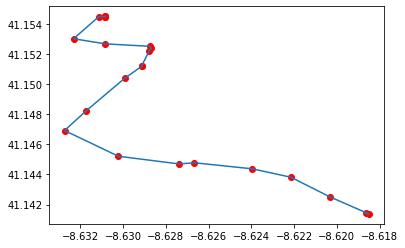

In [16]:
poly = df_tr.iloc[0]['POLYLINE']
coords = poly[2:-2].split('],[')
x_s = []
y_s = []
for coord in coords:
    x, y = coord.split(',')
    x_s += [float(x)]
    y_s += [float(y)]

plt.plot(x_s, y_s)
plt.scatter(x_s, y_s, color='red')

In [3]:
def polyline_to_trip_duration(polyline):
    return max(polyline.count("[") - 2, 0) * 15

# Each x is essentially a 1 row, 1 column pandas Series
def parse_time(x):
    dt = datetime.fromtimestamp(x["TIMESTAMP"])
    return dt.year, dt.month, dt.day, dt.hour, dt.weekday()

In [4]:
# process new features
df_tr["LEN"] = df_tr["POLYLINE"].apply(polyline_to_trip_duration)

df_tr[["YR", "MON", "DAY", "HR", "WK"]] = df_tr[["TIMESTAMP"]].apply(parse_time, axis=1, result_type="expand")
df_te[["YR", "MON", "DAY", "HR", "WK"]] = df_te[["TIMESTAMP"]].apply(parse_time, axis=1, result_type="expand")

In [5]:
df_tr = df_tr[df_tr['LEN']!=0]

In [6]:
len_thresh = int((df_tr['LEN'].mean() + df_tr['LEN'].std())//1)
len_thresh

1415

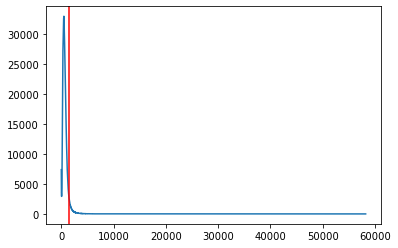

In [7]:
df_tr['LEN'].value_counts().sort_index().plot()
plt.axvline(x = len_thresh, color = 'red')

In [8]:
df_tr = df_tr[df_tr['LEN'] < len_thresh]

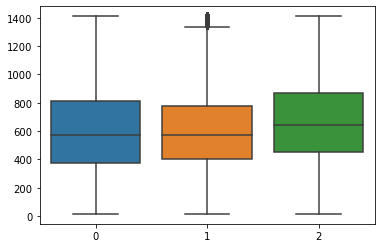

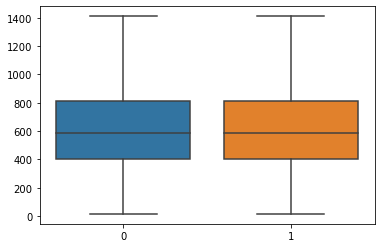

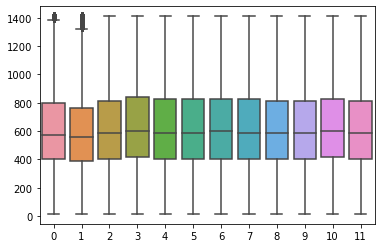

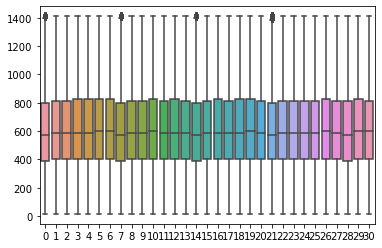

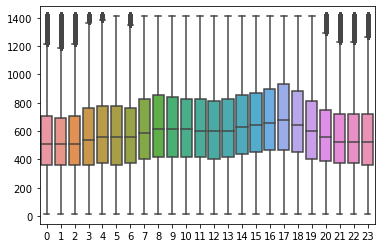

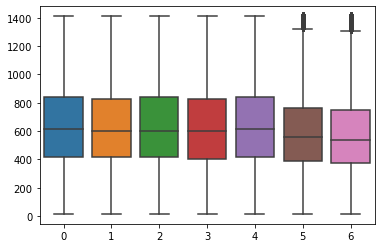

In [9]:
for feat in ["CALL_TYPE", "YR", "MON", "DAY", "HR", "WK"]:
    fig1, ax1 = plt.subplots()
    sns.boxplot(data=[df_tr[df_tr[feat]==val]['LEN'] for val in df_tr[feat].unique()])

In [10]:
features_to_use = ['CALL_TYPE', 'HR', 'WK']
df_tr[features_to_use]

,CALL_TYPE,HR,WK
0,C,0,0
1,B,0,0
2,C,0,0
3,C,0,0
4,C,0,0
...,...,...,...
1710662,B,19,0
1710665,C,23,0
1710666,C,23,0
1710668,B,15,0


In [11]:
df_tr['CALL_TYPE'].value_counts(normalize=True).sort_index() - df_te['CALL_TYPE'].value_counts(normalize=True).sort_index()

A   -0.007884
B    0.109645
C   -0.101761
Name: CALL_TYPE, dtype: float64

In [12]:
df_tr['HR'].value_counts(normalize=True).sort_index() - df_te['HR'].value_counts(normalize=True).sort_index()

0          NaN
1          NaN
2     0.026146
3    -0.157270
4          NaN
5          NaN
6     0.028348
7     0.024337
8    -0.167950
9          NaN
10         NaN
11    0.043935
12    0.042679
13    0.045526
14   -0.021531
15    0.048776
16    0.027802
17   -0.400439
18         NaN
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
Name: HR, dtype: float64

In [13]:
df_tr['WK'].value_counts(normalize=True).sort_index() - df_te['WK'].value_counts(normalize=True).sort_index()

0   -0.107890
1   -0.104058
2         NaN
3   -0.087934
4         NaN
5   -0.039480
6    0.044386
Name: WK, dtype: float64

In [14]:
def compute_ohe(df, feat):
    df = df.copy()
    unique_vals = df[feat].unique()
    for val in unique_vals:
        df[feat + '_' + str(val)] = df[feat].apply(lambda x: 1 if x==val else 0)
    return df

In [15]:
compute_ohe(df_tr, 'MON')

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE,LEN,...,MON_9,MON_10,MON_11,MON_12,MON_1,MON_2,MON_3,MON_4,MON_5,MON_6
0,1372636858620000589,C,NaN,NaN,20000589,1372636858,A,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[...",330,...,0,0,0,0,0,0,0,0,0,0
1,1372637303620000596,B,NaN,7.0,20000596,1372637303,A,False,"[[-8.639847,41.159826],[-8.640351,41.159871],[...",270,...,0,0,0,0,0,0,0,0,0,0
2,1372636951620000320,C,NaN,NaN,20000320,1372636951,A,False,"[[-8.612964,41.140359],[-8.613378,41.14035],[-...",960,...,0,0,0,0,0,0,0,0,0,0
3,1372636854620000520,C,NaN,NaN,20000520,1372636854,A,False,"[[-8.574678,41.151951],[-8.574705,41.151942],[...",630,...,0,0,0,0,0,0,0,0,0,0
4,1372637091620000337,C,NaN,NaN,20000337,1372637091,A,False,"[[-8.645994,41.18049],[-8.645949,41.180517],[-...",420,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710662,1404155105620000121,B,NaN,9.0,20000121,1404155105,A,False,"[[-8.606385,41.144742],[-8.606466,41.144742],[...",1050,...,0,0,0,0,0,0,0,0,0,1
1710665,1404171463620000698,C,NaN,NaN,20000698,1404171463,A,False,"[[-8.612469,41.14602],[-8.612487,41.145993],[-...",465,...,0,0,0,0,0,0,0,0,0,1
1710666,1404171367620000670,C,NaN,NaN,20000670,1404171367,A,False,"[[-8.610138,41.140845],[-8.610174,41.140935],[...",435,...,0,0,0,0,0,0,0,0,0,1
1710668,1404141826620000248,B,NaN,12.0,20000248,1404141826,A,False,"[[-8.630712,41.154885],[-8.63073,41.154813],[-...",915,...,0,0,0,0,0,0,0,0,0,1
